## *To Franch or Not to Franch?* Exploring Sales in Franchised vs Non-Franchised Restaurants

**Introduction**

In the restaurant industry, there are many variables that may directly or indirectly impact success. One key strategy often implemented by business owners is franchising, which is the practice of granting an individual or a company the rights to operate a part or all of their business under its original brand. For smaller businesses, franchising may be beneficial as it offers financial security, business expertise, and more expansion opportunities under established management. Studies show that franchised firms in the hospitality and retail industries typically experience higher profitability compared to non-franchised firms (Hsu & Jang, 2009; Moon & Sharma, 2014). While franchising has resulted in rapid growth in America’s retail and hospitality industries, the question arises of whether franchising increases sales in the restaurant industry as well. 

Therefore, the purpose of this project is to explore whether there is a difference in sales between franchised restaurants and non-franchised restaurants across all fast-growing restaurants in America. To examine this potential difference, the mean of sales will be used as the location parameter and the standard deviation of sales will be used as the scale parameter. These parameters are better suited for the data as there does not appear to be a heavy skew with many outliers in the distributions. Furthermore, the values are all away from 0 and are in the range of 20-50 million dollars.

For this exploration, the Future50 dataset will be used, which is a list of the fastest-growing American restaurants in 2020 compiled by Restaurant Business Magazine. Restaurants in this set have between $20-50 million in annual sales and they are ranked based on the greatest difference in system-wide sales from 2018 to 2019. Columns in this dataset include the following attributes:  
  
* `Rank` - Ranking of the restaurant based on system wide sales from 2018-2019
* `Restaurant` - Name of the restaurant brand  
* `Location` - City and state where the restaurant is based 
* `Sales` - System-wide sales for 2019
* `YOY_Sales` - Year-on-year percentage increase in sales
* `Units` - Number of units (premises)
* `YOY_Units` - Year-on-year percentage increase in units
* `Unit_Volume` - Average unit volume for 2019
* `Franchising` - Whether or not the restaurant brand is franchised

Since sales are the main revenue stream for a restaurant, they are imperative to a company's profitability and overall success. Analyzing sales as a measure of success may provide insight into financially effective business strategies. Therefore, this analysis will use the system-wide sales as a measure of success to be compared between franchised and non-franchised restaurants. This dataset will be treated as a sample of 50 restaurants, of which 29 are franchises and 21 are non-franchises.

**Methods and Results**  

In [6]:
# loading required libraries
library(tidyverse)
library(dplyr)
library(infer)
library(ggplot2)
library(tibble)
library(cowplot)

In [7]:
# reading and previewing the data from online
future50_raw <- read_csv("https://drive.google.com/uc?id=1PAUMvsMZahDVFDRbyIq4QywM_A-8dlux&export=download", show_col_types = FALSE) #nolint
head(future50_raw)

Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes


Table 1: Raw data from the dataset.

In this dataset, there are 50 rows in total, representing 50 different restaurants. This exploration will be focusing on the Sales (shown in millions), and Franchising status.  
Thus, the next step is to clean and wrangle the data.

In [8]:
# selecting only Sales and Franchising columns
future50_selected <- future50_raw %>%
    select(Sales, Franchising)

# transforming Franchising column from character type to logical type
future50_logical <- future50_selected %>%
    mutate(Franchising = ifelse(Franchising == "Yes", 1, 0)) %>%
    mutate(Franchising = as.logical(Franchising))

# tidy data
future50 <- future50_logical
head(future50)

Sales,Franchising
<dbl>,<lgl>
24,FALSE
44,TRUE
21,TRUE
25,TRUE
49,TRUE
39,TRUE


Table 2: Tidy data from dataset. Only the sales and their franchising status is shown now.  
  
To visualize the two groups (franchised vs non-franchised), their distributions can be plotted on histograms.

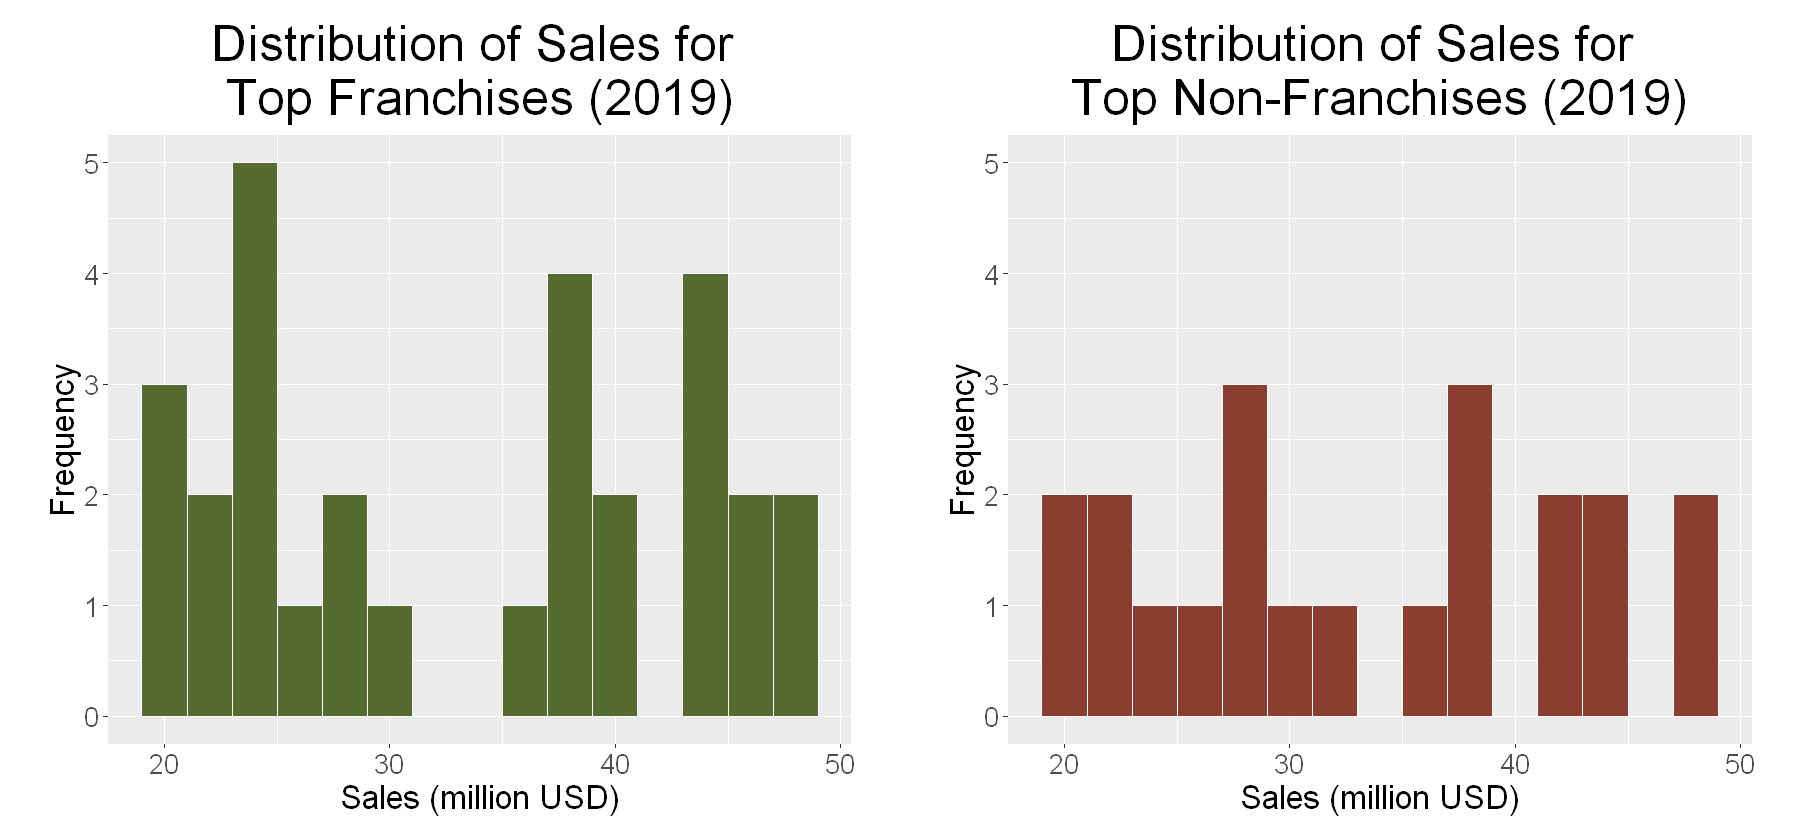

In [9]:
# franchised restaurants data
future50_yes <- future50 %>%
    filter(Franchising == TRUE)

# franchised restaurants plot
future50_yes_plot <- future50_yes %>%
    ggplot(aes(x = Sales)) +
    geom_histogram(binwidth = 2, colour = "white", fill = "darkolivegreen") +
    labs(title = "Distribution of Sales for \nTop Franchises (2019)",
         x = "Sales (million USD)",
         y = "Frequency") +
    ylim(0, 5) +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))

# non-franchised restaurants data
future50_no <- future50 %>%
    filter(Franchising == FALSE)

# non-franchised restaurants plot
future50_no_plot <- future50_no %>%
    ggplot(aes(x = Sales)) +
    geom_histogram(binwidth = 2, colour = "white", fill = "coral4") + 
    labs(title = "Distribution of Sales for \nTop Non-Franchises (2019)",
         x = "Sales (million USD)",
         y = "Frequency") +
    ylim(0, 5) +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20),
          plot.margin = unit(c(1, 2, 1, 2), "lines"))

# plot display
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(future50_yes_plot, future50_no_plot)

Figure 1.1 (Left): Distribution of Sales for Top Franchises (2019).  
Figure 1.2 (Right): Distribution of Sales for Top Non-Franchises (2019).  
  
Next, estimates will be computed for the parameter of the mean total sales of all franchised and non-franchised restaurants across all restaurants in America.

In [10]:
# estimating the population parameter and spread for franchised restaurants
future50_yes_estimate <- future50_yes %>%
    summarise(franchised_sales_mean = mean(Sales),
              franchised_sales_sd = sd(Sales))

# estimating the population parameter and spread for non-franchised restaurants
future50_no_estimate <- future50_no %>%
    summarise(nonfranchised_sales_mean = mean(Sales),
              nonfranchised_sales_sd = sd(Sales))

# parameter estimate
estimates <- merge(future50_yes_estimate, future50_no_estimate)
estimates

franchised_sales_mean,franchised_sales_sd,nonfranchised_sales_mean,nonfranchised_sales_sd
<dbl>,<dbl>,<dbl>,<dbl>
33.82759,9.964469,33.71429,9.30668


 Table 3: Estimates for the parameter of total sales across all restaurants in America, in million USD (grouped by franchising status).  
 
 From this preliminary viewing of the data, it can be seen that the mean sales for franchised restaurants is slightly higher than the mean sales for non-franchised restaurants. Based on previous studies, it is expected that franchised restaurants do have higher sales than non-franchised restaurants. However, whether the difference observed in this sample is statistically significant has yet to be confirmed. 
  
In order to determine whether the observed difference in mean sales is indeed statistically significant, hypothesis tests can be conducted using both traditional and simulation based methods, with a chosen significance level of $\alpha = 0.05$. The null hypothesis is that there is no difference between sales of fast-growing franchised and non-franchised restaurants in America. The alternative hypothesis is that fast-growing franchised restaurants have higher sales than non-franchised restaurants, thus being a one sided alternative hypothesis. In other words:
- $H_0: μ_f - μ_{nf} = 0$
- $H_A: μ_f - μ_{nf} > 0$  

Where $μ_f$ represents the mean sales of fast-growing franchised restaurants in America, and $μ_{nf}$ represents the mean sales of fast-growing non-franchised restaurants in America.

**Traditional Two Sample T-Test**  

One method of hypothesis testing is to use a traditional theory-based method: Welch's two sample t-test. The advantage of using Welch's t-test over the Student's t-test is that Welch's t-test tends to perform better under unequal sample sizes and variances. The dataset does have unequal sample sizes after categorizing by franchising status (29 franchised restaurants and 21 non-franchised restaurants). However, some key assumptions still remain:

- *Normally distributed populations or large sample sizes (n > 30)*
- *Both samples are selected via random sampling*
- *Samples are selected independently from each other*
- *All observations are independent from each other*  
- *Data consists of continuous variables*


In verifying these assumptions, it is evident that the groups are of unequal sizes, and neither groups have sample sizes greater than 30 nor are they normally distributed (Figure 1.1, Figure 1.2). Furthermore, the restaurants in this dataset were not collected through random sampling - they are in fact the top performing restaurants of all fast growing restaurants in America. However, samples and observations are still independent and they are continuous variables as monetary amounts. Although the test can still be performed, the failure to meet 2 of these assumptions will lower the validity of the output.

The Welch's two sample t-test is computed below.

In [8]:
# separating franchised restaurants into a vector
f <- future50 %>%
    filter(Franchising == TRUE) %>%
    select(Sales) %>%
    as.vector()

# separating non-franchised restaurants into a vector
nf <- future50 %>%
    filter(Franchising == FALSE) %>%
    select(Sales) %>%
    as.vector()

# performing a Welch's two sample t-test with a one sided alternative hypothesis
ttest_result <- t.test(f, nf, alternative = "greater")
ttest_result


	Welch Two Sample t-test

data:  f and nf
t = 0.041239, df = 44.891, p-value = 0.4836
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -4.501024       Inf
sample estimates:
mean of x mean of y 
 33.82759  33.71429 


Figure 2: Welch's two sample t-test  

The Welch's two sample t-test has given the following output:
- test statistic = 0.041239
- p-value = 0.4836

The p-value represents the probability of obtaining a result that is at least as extreme as the observed difference, under the assumption of the null hypothesis. Since the p-value is greater than the chosen significance level of $\alpha = 0.05$, we fail to reject the null hypothesis, as the test is statistically insignificant at the chosen alpha level. Thus, based on this test, the difference between franchised and non-franchised restaurant sales is not significantly greater than 0.

**Simulation Based Hypothesis Test**

Another method of hypothesis testing is to use computation to simulate the null hypothesis distribution in order to determine the probability of observing a difference at least as extreme as the test statistic. The advantage of using a simulation based test over a theory based test is that there are fewer assumptions regarding the sample. The only assumption is that the data in each group is obtained via random sampling from the population. While this assumption is still not met, there is no longer the assumption of a
normal distribution or a sufficiently large sample size. As such, the simulation based test will provide a relatively more valid output over the theory based t-test.  

The simulation based hypothesis test is computed below.

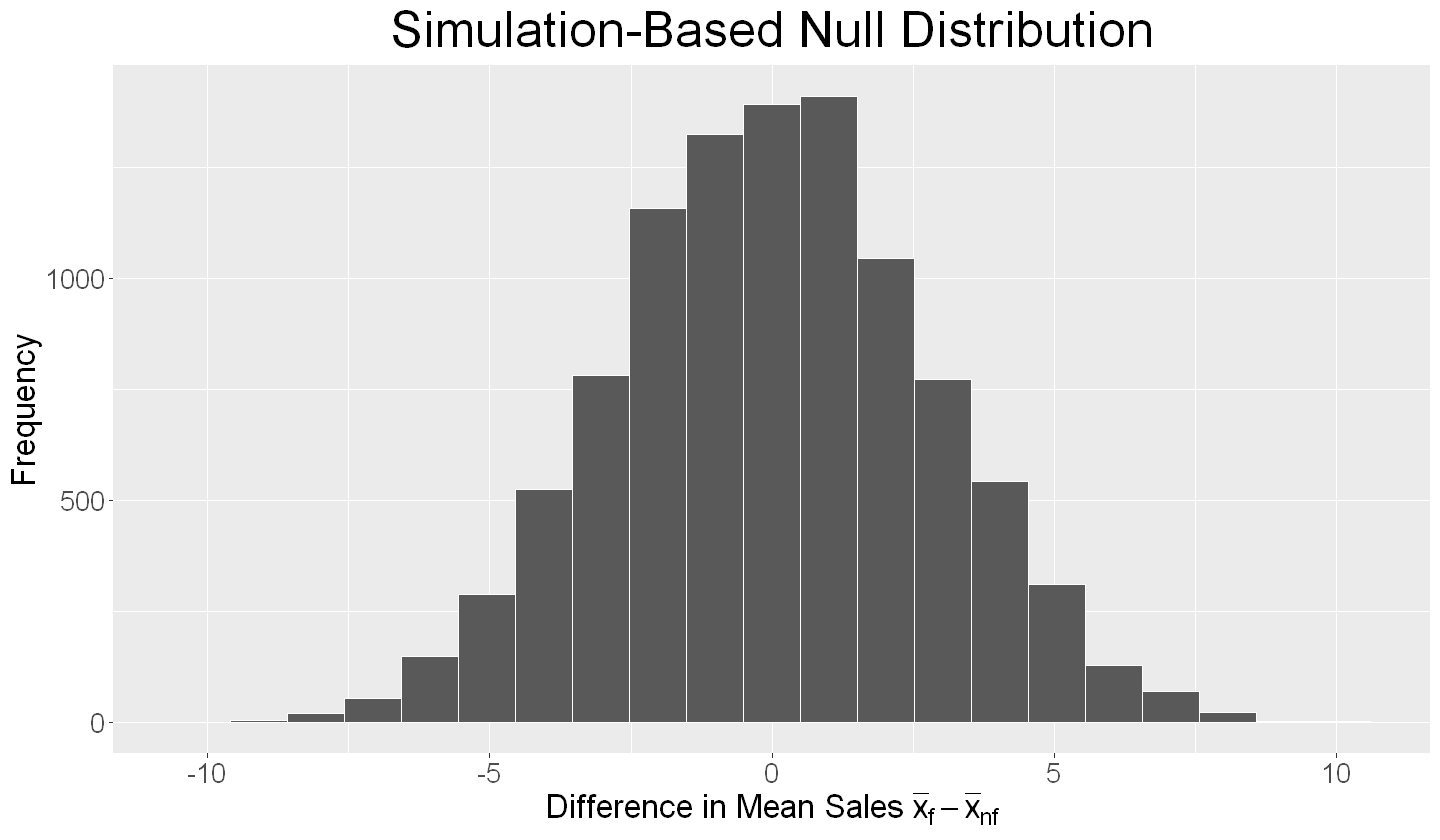

In [9]:
# setting seed for reproducable results
set.seed(100)

# creating the null distribution by randomizing the franchising status
# difference in means is ordered as franchised (TRUE) - non-franchised (FALSE)
null_distribution <- future50 %>%
    specify(formula = Sales ~ Franchising) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("TRUE", "FALSE"))

# visualizing the null distribution
options(repr.plot.width = 12, repr.plot.height = 7)
visualize(null_distribution, bins = 21) +
    labs(title = "Simulation-Based Null Distribution",
         x = expression(paste("Difference in Mean Sales ",
                              bar(x)[f] - bar(x)[nf])),
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20))


Figure 3.1: Simulation Based Null Distribution, displaying what the estimate of the sampling distribution would look like under the assumption of the null hypothesis. This is achieved through random permutation of the franchising status in the dataset. Thus, when resamples are drawn without replacement, the resulting output represents a hypothetical unbiased difference in mean sales (in million USD).  

The observed test statistic, which is the observed difference in mean sales, can then be calculated and visualized on the null distribution.

[1] "p-value: 0.488"

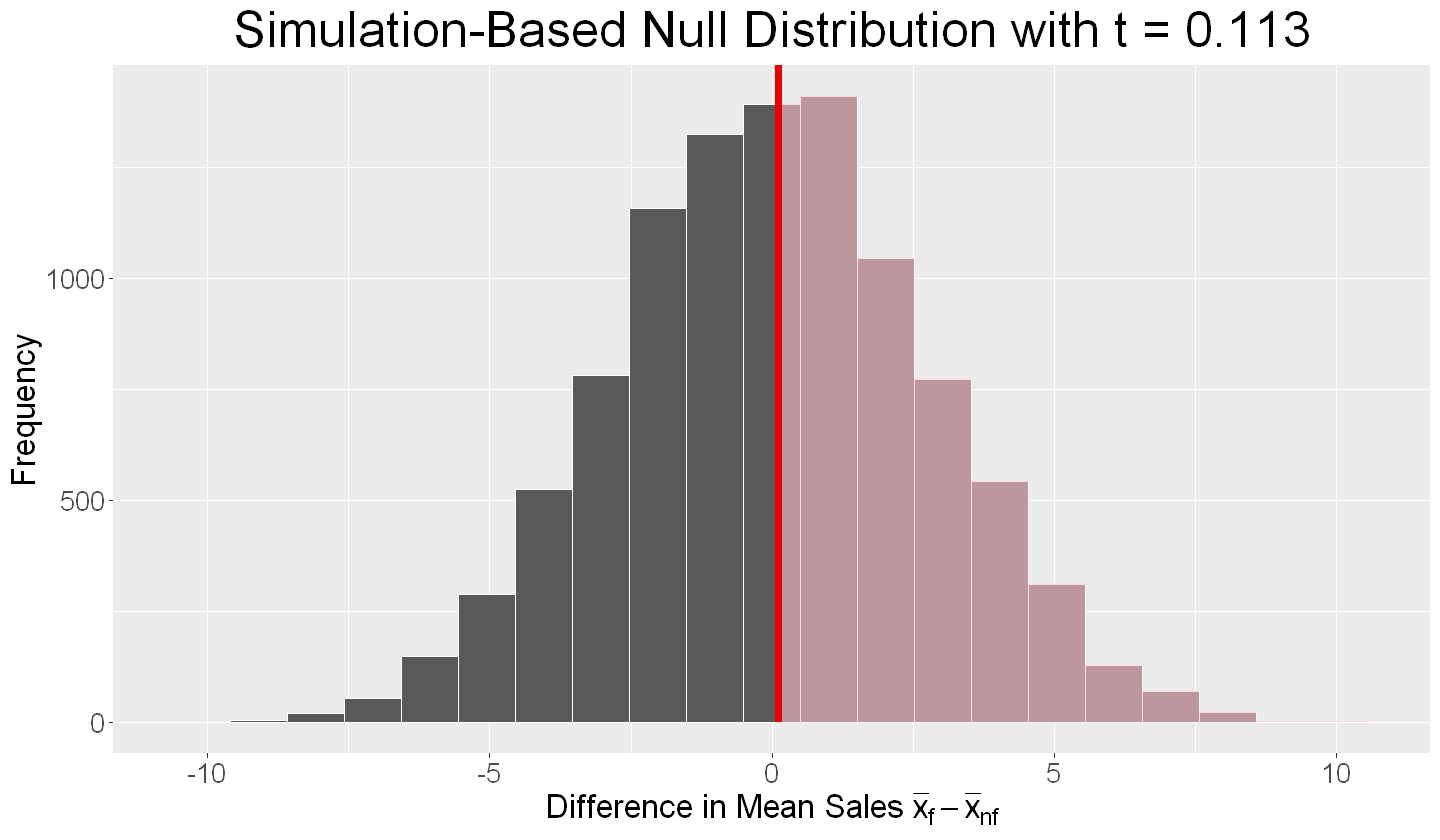

In [10]:
# computing the observed difference from the original sample
observed_difference <- future50 %>%
    specify(formula = Sales ~ Franchising) %>%
    calculate(stat = "diff in means", order = c("TRUE", "FALSE"))

# visualizing the observed difference on the null distribution
options(repr.plot.width = 12, repr.plot.height = 7)
visualize(null_distribution, bins = 21) +
    shade_p_value(obs_stat = observed_difference, direction = "right") +
    labs(title = paste("Simulation-Based Null Distribution with t =",
                       round(pull(observed_difference), 3)),
         x = expression(paste("Difference in Mean Sales ",
                              bar(x)[f] - bar(x)[nf])),
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20))

# obtaining p-value
pval <- null_distribution %>%
    get_p_value(obs_stat = observed_difference, direction = "right") %>%
    pull()
paste("p-value:", pval)

Figure 3.2: Simulation Based Null Distribution with Observed Test Statistic of t = 0.113. The p-value associated with the observed test statistic is 0.488.  

The shaded region of the simulated null distribution represents the probability associated with observing a difference in mean sales (in million USD) as extreme or more extreme than the observed test statistic of 0.113. This region is relatively large, and is confirmed by the p-value of 0.488. This means that the chance to observe a difference at least as extreme as the test statistic *purely due to random sampling variation* is 48.8%. Since the p-value is greater than the chosen significance level of $\alpha = 0.05$, we fail to reject the null hypothesis, as the test is statistically insignificant at the chosen alpha level. Thus, based on this test, the difference between franchised and non-franchised restaurant sales is not significantly greater than 0.

**Confidence Interval**  

Lastly, a confidence interval can be constructed as a measure of uncertainty for the difference in mean sales. This can be accomplished through creating a bootstrap distribution of the sample, which approximates the sampling distribution of the difference in mean sales. Based on the Central Limit Theorem (CLT), the sampling distribution of an estimator converges to the normal distribution with the following assumptions:  

- *Data must be selected via random sampling*
- *Normally distributed populations or large sample sizes (n > 30)*
- *Sample size should be less than 10% of the population*
- *All sample values are independent of each other* 
  
While the first two assumptions are still not met, the sample sizes are less than 10% of the populations, and the values are independent from each other. The CLT is still applicable, albeit with lower validity. Nevertheless, approximating the sampling distribution allows for inferences to be made regarding the spread of the data. While the bootstrap distribution is unlikely to have the same center as the sampling distribution, it will likely have a very similar shape and spread. As such, the bootstrap distribution will be able to provide a good estimate of the standard error and sampling variation, from which a confidence interval can be created. It is important to convey the certainty associated with the parameter estimate because ultimately, the true population parameter for the difference in mean sales still remains unknown.  

Below, a 95% confidence interval is constructed on a bootstrap distribution of the sample, using the percentile method.

[1] "95% Confidence Interval: ( -5.452 , 5.393 )"

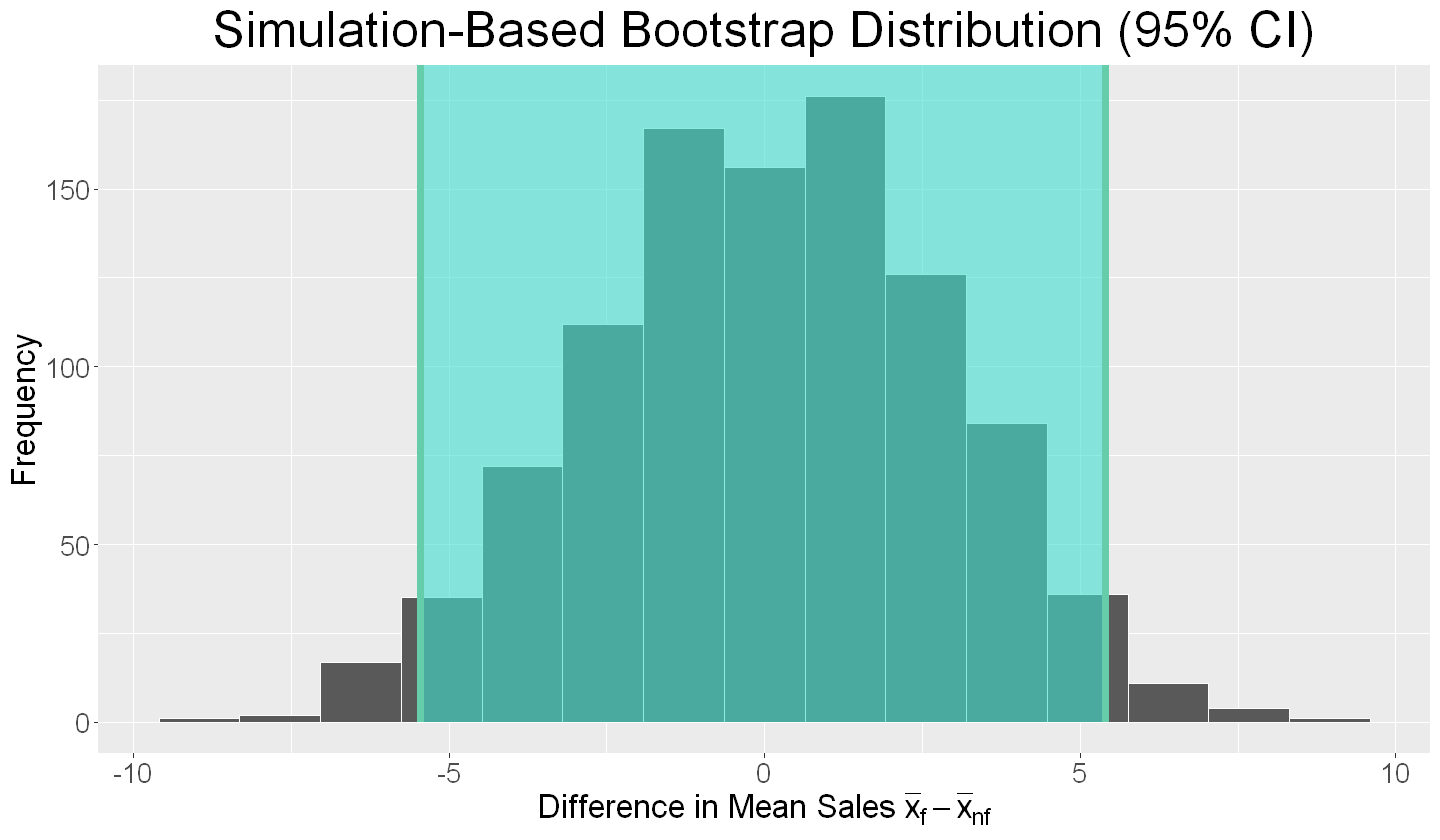

In [20]:
# setting seed for reproducable results
set.seed(100)

# creating the bootstrap distribution by resampling with replacement
# difference in means is ordered as franchised (TRUE) - non-franchised (FALSE)
bootstrap_distribution <- future50 %>%
    specify(formula = Sales ~ Franchising) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("TRUE", "FALSE"))

# calculating the 95% confidence interval using the percentile method
percentile_ci <- bootstrap_distribution %>%
    get_confidence_interval(level = 0.95, type = "percentile")
paste("95% Confidence Interval: (",
      round(pull(percentile_ci, lower_ci), 3), ",",
      round(pull(percentile_ci, upper_ci), 3), ")")

# visualizing the 95% confidence interval on the bootstrap distribution
options(repr.plot.width = 12, repr.plot.height = 7)
visualize(bootstrap_distribution) +
    shade_confidence_interval(endpoints = percentile_ci) +
    labs(title = "Simulation-Based Bootstrap Distribution (95% CI)",
         x = expression(paste("Difference in Mean Sales ",
                              bar(x)[f] - bar(x)[nf])),
         y = "Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size = 30),
          text = element_text(size = 20))

Figure 4: Simulation Based Bootstrap Distribution with 95% Confidence Interval. The shaded confidence interval is (-5.120, 5.417). This confidence intervals provides a possible range of values (in million USD) for the difference in the mean sales between franchised and non-franchised restaurants.

This indicates that if 100 samples of n = 50 restaurants were gathered and a confidence interval was constructed for each of those 100 samples, then it is expected that 95 of those confidence intervals will capture the true value of $μ_f - μ_{nf}$. In other words, we are 95% confident that the true difference between the parameters $μ_f - μ_{nf}$ is between (-5.120, 5.417). However, it is important to note that this interval in fact contains the value 0, which would suggest that there is no difference in mean sales between franchised and non-franchised restaurants. As a result, it cannot be conclusively stated that franchised restaurants have higher mean sales, or that either restaurant type have higher mean sales.

**Discussion**

Overall, the three tests performed are in concurrence with each other, concluding with the inability to reject the null hypothesis as there is no statistically significant difference between the mean sales of franchised and non-franchised restaurants. Although franchised restaurants were expected to perform better, it is evidently not the case based on this analysis.  

One possible explanation for this conclusion may be the abnormal shapes of the sample distributions. Although there is no heavy skew, the sample distribution for the franchised restaurants (shown in Figure 1.1) appears multimodal, with one mode centering at ~24 million USD, another at ~38 million USD, and a third at ~43 million USD. The sample distribution for the non-franchised restaurants (shown in Figure 1.2) appears to be bimodal, with modes centering at ~28 million USD and the second at ~39 million USD. The abnormal distributions lower the feasibility of using the mean as a representative measure of the samples, as it can be seen that the modes in the franchised restaurant distribution are generally at higher valuations than the modes in the non-franchised restaurant distribution. However, the sample size is relatively small, making the difference between peaks and troughs relatively marginal.

Another explanation could be attributed to the top ranking performance of the restaurants in the dataset. Since the dataset contains some of the fastest growing restaurants across America, the restaurants included were likely already performing very well solely under their own brand, and franchising may not make a large difference at this point. This effect could be even more apparent at the very top ranks of all fast growing restaurants in America. Thus, this dataset (which does contain the most successful restaurants), would not be a good representation or generalizable to other restaurants or even fast growing restaurants. In addition to this, previous literature has shown an inverted-U relationship between franchising proportion and profitability, where there exists an optimal point for franchising proportion. This means that not all restaurant brands that are franchised are franchised to the same degree, and some may not be meeting the conditions for optimal profitability.

One way to improve this analysis is to use the median and IQR as parameters, rather than the mean and standard deviation. Since the sample distributions were not unimodal, it may have been more viable to use these parameters to summarise the data. Further questions this study could lead to may include exploring the difference in sales between franchised and non-franchised restaurants that are experiencing slow or stagnant growth. Since the purpose of franchising is to offer business expertise and increase their capital growth, the benefits could become more apparent with businesses that have lower capital. Another topic for research could focus on the optimal points of franchising at which profitability is maximized. Businesses can choose to franchise only parts of their brand, which means that not all franchised businesses are equal comparisons, while some may even be losing revenue. However, this relationship and the factors affecting the optimum were not well explored.

**References**

Encyclopedia.com. *Franchise*. (n.d.). Retrieved March 3, 2022, from https://www.encyclopedia.com/social-sciences-and-law/economics-business-and-labor/businesses-and-occupations/franchise

Hsu, L.-T. (Jane), & Jang, S. (Shawn). (2009). Effects of restaurant franchising: Does an optimal franchise proportion exist? *International Journal of Hospitality Management*, 28(2), 204–211. https://doi.org/10.1016/j.ijhm.2008.07.002

Moon, J., & Sharma, A. (2014). Franchising Effects on the Lodging Industry: Optimal Franchising Proportion in Terms of Profitability and Intangible Value. *Tourism Economics*, 20(5), 1027–1045. https://doi.org/10.5367/te.2013.0336

*Restaurant business rankings 2020*. (n.d.). Retrieved March 3, 2022, from https://kaggle.com/michau96/restaurant-business-rankings-2020

*The Future 50*. (n.d.). Restaurant Business. Retrieved March 3, 2022, from https://restaurantbusinessonline.com/future-50-2020